# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [3]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [4]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [6]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/Users/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 10.780s 


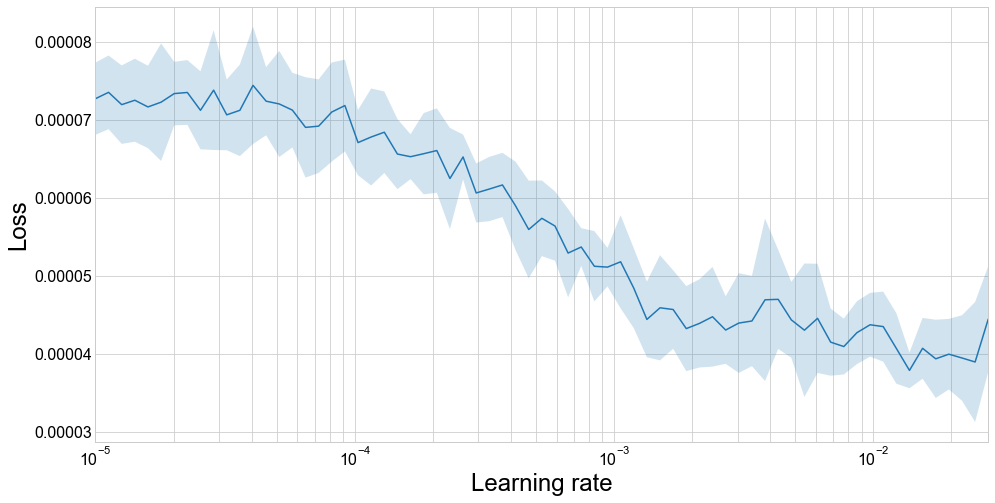

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [8]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode

1 New best found: 3.670224688772662e-05
2 New best found: 3.484214665247151e-05
3 New best found: 3.4343323976101974e-05
4 New best found: 3.4055385230205915e-05
5 New best found: 3.335517567327312e-05
6 New best found: 3.3290273590451057e-05
7 New best found: 3.306483528826311e-05
12 New best found: 3.284968513047578e-05
13 New best found: 3.254901732939408e-05
14 New best found: 3.248742211246141e-05
15 New best found: 3.247465649776256e-05
25 New best found: 3.2146484359479716e-05
27 New best found: 3.208709264278979e-05
28 New best found: 3.205018921442905e-05
29 New best found: 3.2014670111859566e-05
30 New best found: 3.2013768024816826e-05
31 New best found: 3.201350733468464e-05
50 New best found: 3.1993922331622424e-05
52 New best found: 3.182814060386065e-05
54 New best found: 3.1757726151644214e-05
61 New best found: 3.175030066735276e-05
62 New best found: 3.17469

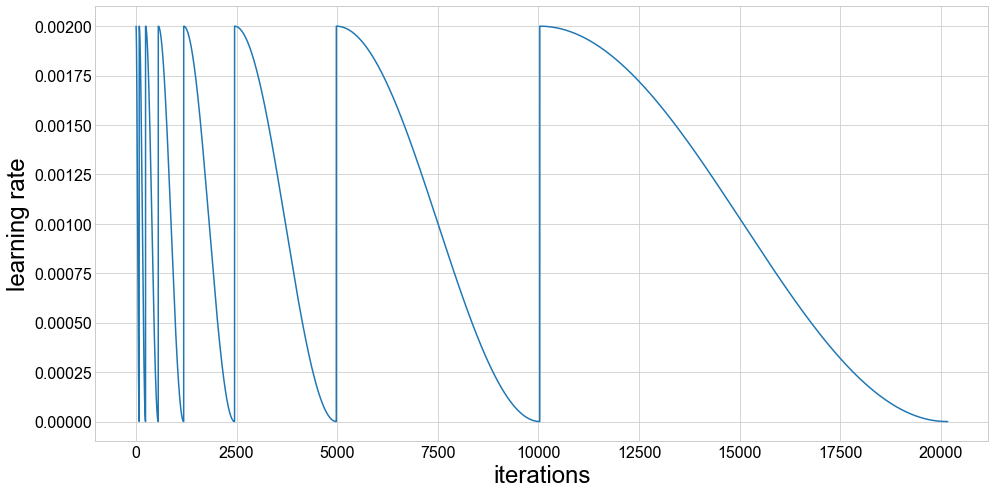

Fold took 129.499s

Training model 2 / 10
Using cosine LR annealing
1 New best found: 3.63325311394874e-05
2 New best found: 3.4362119699653707e-05
3 New best found: 3.4150818137277384e-05
5 New best found: 3.356455115863355e-05
6 New best found: 3.34626308947918e-05
7 New best found: 3.3215532050235195e-05
10 New best found: 3.308112878148677e-05
11 New best found: 3.297708575846627e-05
13 New best found: 3.272480599116534e-05
14 New best found: 3.2597943030123134e-05
15 New best found: 3.2579730010184e-05
23 New best found: 3.2447622032486835e-05
27 New best found: 3.237931006297003e-05
28 New best found: 3.219658007437829e-05
54 New best found: 3.21852617780678e-05
55 New best found: 3.2156773617316504e-05
56 New best found: 3.214302078995388e-05
58 New best found: 3.212136672373163e-05
59 New best found: 3.211825055768713e-05
60 New best found: 3.211660323868273e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.342114733391104e-05
128 New best found: 3.210695

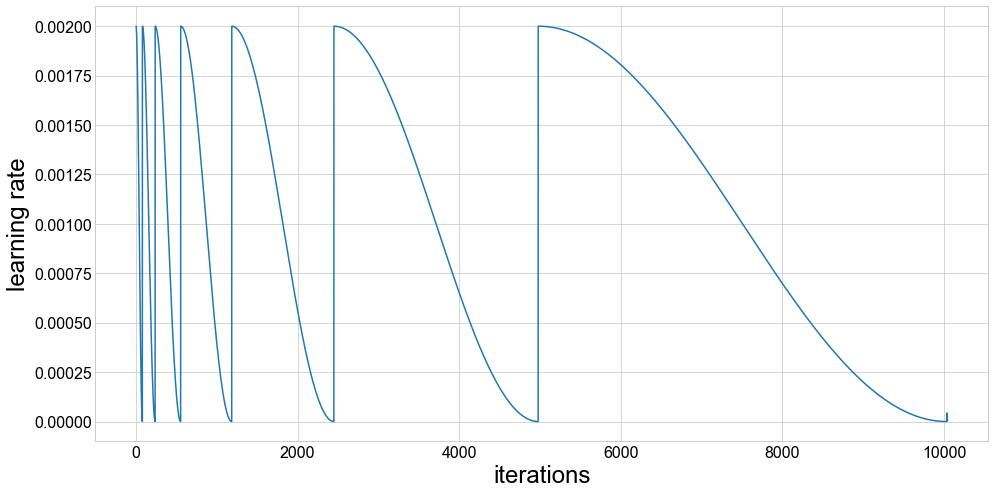

Fold took 66.333s

Training model 3 / 10
Using cosine LR annealing
1 New best found: 3.648959502606885e-05
2 New best found: 3.453407940105535e-05
3 New best found: 3.410844690806698e-05
5 New best found: 3.337071105634095e-05
6 New best found: 3.2753783599764573e-05
11 New best found: 3.267709831125103e-05
12 New best found: 3.239481749915285e-05
13 New best found: 3.216223750932841e-05
14 New best found: 3.2100040504883506e-05
15 New best found: 3.2080905925249684e-05
23 New best found: 3.190873608691618e-05
25 New best found: 3.1859964536852204e-05
27 New best found: 3.1714881991501896e-05
28 New best found: 3.165800617716741e-05
29 New best found: 3.165036544378381e-05
30 New best found: 3.1622706315829415e-05
31 New best found: 3.161877305101371e-05
55 New best found: 3.156592942978023e-05
58 New best found: 3.152556708955672e-05
59 New best found: 3.152422944258433e-05
60 New best found: 3.152201881748624e-05
61 New best found: 3.15094152581878e-05
CosineAnneal stalling after 127

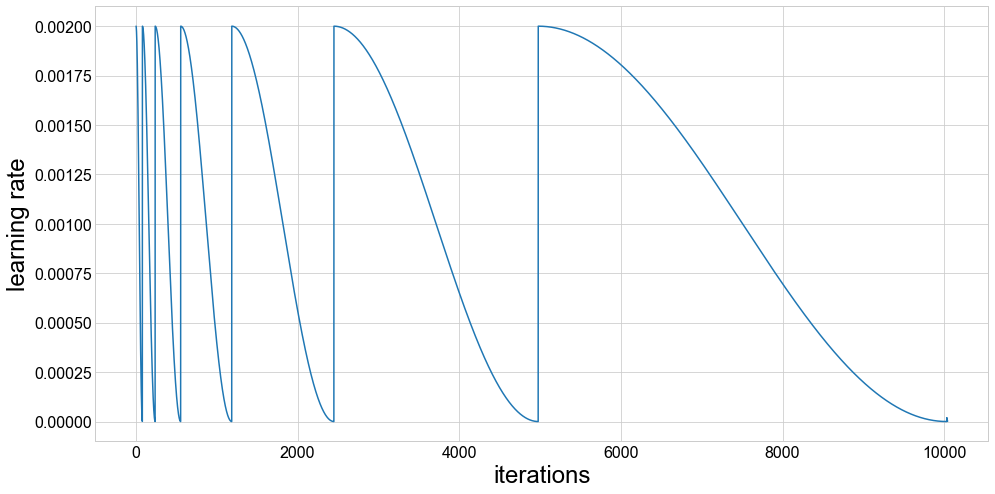

Fold took 67.734s

Training model 4 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102433). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8043650353089275e-05
2 New best found: 3.496697009524446e-05
3 New best found: 3.392998387597052e-05
4 New best found: 3.336824371507266e-05
5 New best found: 3.316337870556673e-05
6 New best found: 3.265043860656001e-05
7 New best found: 3.2556758486499904e-05
10 New best found: 3.2468588523676795e-05
11 New best found: 3.230711862723915e-05
12 New best found: 3.224916360122741e-05
13 New best found: 3.1993007458039344e-05
14 New best found: 3.1981135802707205e-05
15 New best found: 3.191474213163086e-05
25 New best found: 3.17134786792147e-05
27 New best found: 3.15569093316317e-05
28 New best found: 3.1471121822219187e-05
29 New best found: 3.145775565981231e-05
30 New best found: 3.144715127557551e-05
31 New best found: 3.144132406798831e-05
52 New best found: 3.13966350871426e-05
54 New best found: 3.138422674371726e-05
55 New best found: 3.1260466278296724e-05
56 New best found: 3.122501787050884e-05
57 New best found: 3.122325530740478e-05
58 New best found: 

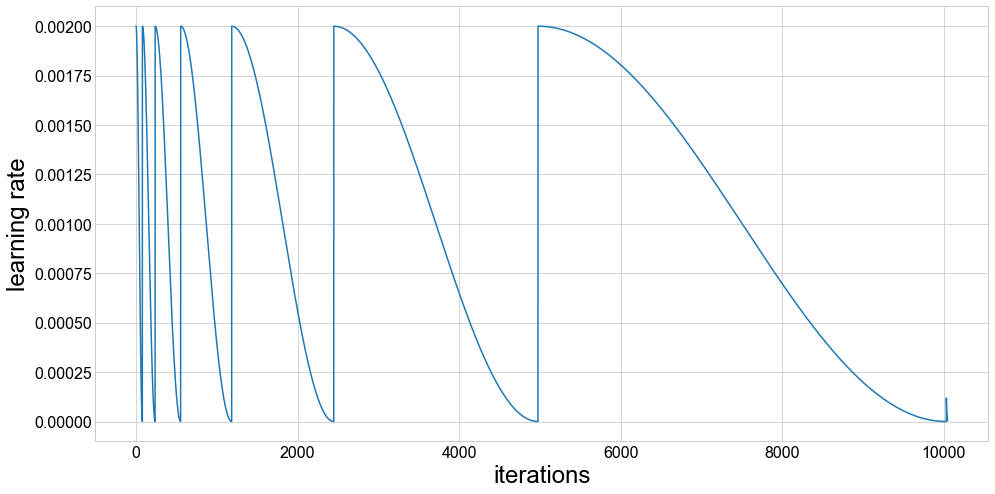

Fold took 73.046s

Training model 5 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.110160). Check your callbacks.
  % delta_t_median)


1 New best found: 3.6802130308969864e-05
2 New best found: 3.486451836905219e-05
3 New best found: 3.419020291991426e-05
5 New best found: 3.3309203775167465e-05
6 New best found: 3.310144302583908e-05
7 New best found: 3.289281685415056e-05
11 New best found: 3.248555706742398e-05
12 New best found: 3.2404871396106656e-05
13 New best found: 3.2342087669146224e-05
14 New best found: 3.215496800329627e-05
15 New best found: 3.212151752641047e-05
24 New best found: 3.2089480388739656e-05
25 New best found: 3.201864096595056e-05
26 New best found: 3.190243440733024e-05
27 New best found: 3.186018451795733e-05
28 New best found: 3.173236418304459e-05
29 New best found: 3.1710508100723957e-05
30 New best found: 3.1682861336119446e-05
31 New best found: 3.167798952186677e-05
49 New best found: 3.167182216408299e-05
50 New best found: 3.161375567620036e-05
52 New best found: 3.1457380571158985e-05
55 New best found: 3.14236069977014e-05
59 New best found: 3.1404609083353855e-05
60 New best fo

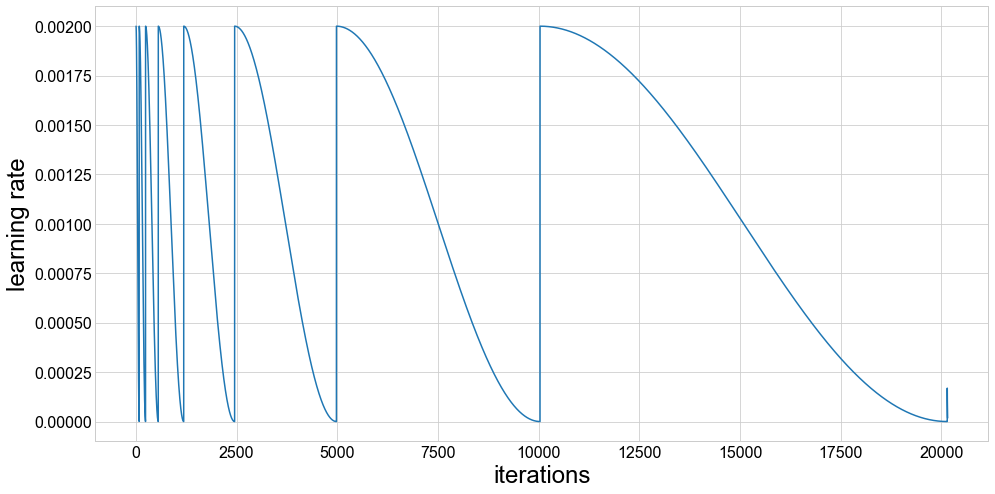

Fold took 134.075s

Training model 6 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.240029). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.120342). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7614240148032546e-05
2 New best found: 3.535757690055708e-05
3 New best found: 3.45397340216176e-05
4 New best found: 3.426023677805951e-05
5 New best found: 3.376761310388474e-05
6 New best found: 3.303789455181763e-05
7 New best found: 3.2767929610673724e-05
11 New best found: 3.250823968962947e-05
12 New best found: 3.2122113894080726e-05
13 New best found: 3.2046950110647294e-05
14 New best found: 3.1892545522834634e-05
15 New best found: 3.1884933365608335e-05
22 New best found: 3.177254522992936e-05
23 New best found: 3.177043879736071e-05
25 New best found: 3.1545028396773015e-05
28 New best found: 3.147418236746888e-05
29 New best found: 3.143158854659698e-05
30 New best found: 3.141817588874406e-05
51 New best found: 3.136182549705164e-05
54 New best found: 3.126854379377095e-05
55 New best found: 3.125013980780242e-05
56 New best found: 3.123660444961409e-05
57 New best found: 3.118529548250984e-05
60 New best found: 3.1181757435427914e-05
61 New best foun

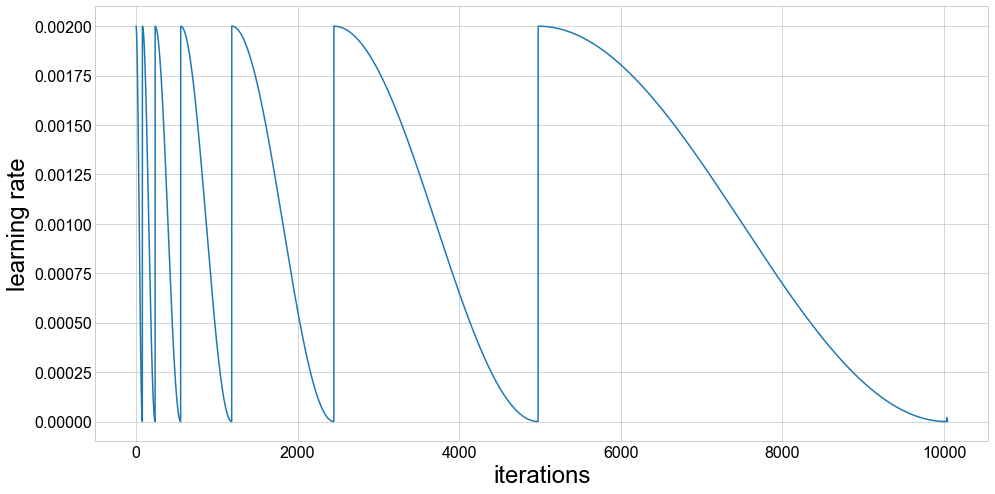

Fold took 73.399s

Training model 7 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.245426). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.123006). Check your callbacks.
  % delta_t_median)


1 New best found: 3.699433435249375e-05
2 New best found: 3.465144109359244e-05
3 New best found: 3.419050618977053e-05
4 New best found: 3.36883951233176e-05
6 New best found: 3.311972909650649e-05
7 New best found: 3.303300792322261e-05
10 New best found: 3.257479380990844e-05
13 New best found: 3.2274296479590705e-05
23 New best found: 3.222884546557907e-05
25 New best found: 3.212045754335122e-05
26 New best found: 3.210122508462518e-05
27 New best found: 3.196118771011243e-05
28 New best found: 3.193302117433632e-05
29 New best found: 3.184709700581152e-05
30 New best found: 3.181606558646308e-05
31 New best found: 3.181532327580498e-05
54 New best found: 3.172445486998185e-05
55 New best found: 3.167593014004524e-05
56 New best found: 3.166112796170637e-05
57 New best found: 3.158272954169661e-05
58 New best found: 3.1553852668730545e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=0.00011866523563337161
130 New best found: 3.155334480543388e-05
Early stoppi

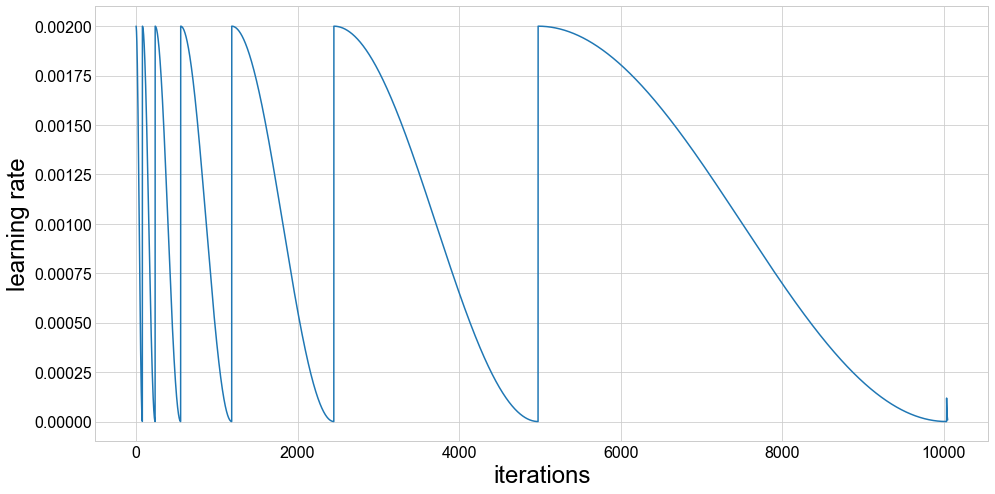

Fold took 76.004s

Training model 8 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.263484). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.132073). Check your callbacks.
  % delta_t_median)


1 New best found: 3.73474420569805e-05
2 New best found: 3.557103659615448e-05
3 New best found: 3.502370939676119e-05
5 New best found: 3.49439086422477e-05
6 New best found: 3.364459406386163e-05
7 New best found: 3.361032151221098e-05
11 New best found: 3.3170231958126076e-05
12 New best found: 3.307040420449803e-05
13 New best found: 3.281932235297713e-05
14 New best found: 3.272378213746219e-05
15 New best found: 3.2695988573669564e-05
24 New best found: 3.237402902856751e-05
28 New best found: 3.235180036538992e-05
29 New best found: 3.2323339169364105e-05
30 New best found: 3.2322357421609114e-05
31 New best found: 3.231997230320107e-05
48 New best found: 3.222571261111303e-05
51 New best found: 3.2206881873804135e-05
52 New best found: 3.213936703240331e-05
56 New best found: 3.208833199233329e-05
58 New best found: 3.2035027810323916e-05
60 New best found: 3.200218728129721e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.342114733391104e-05
134 New bes

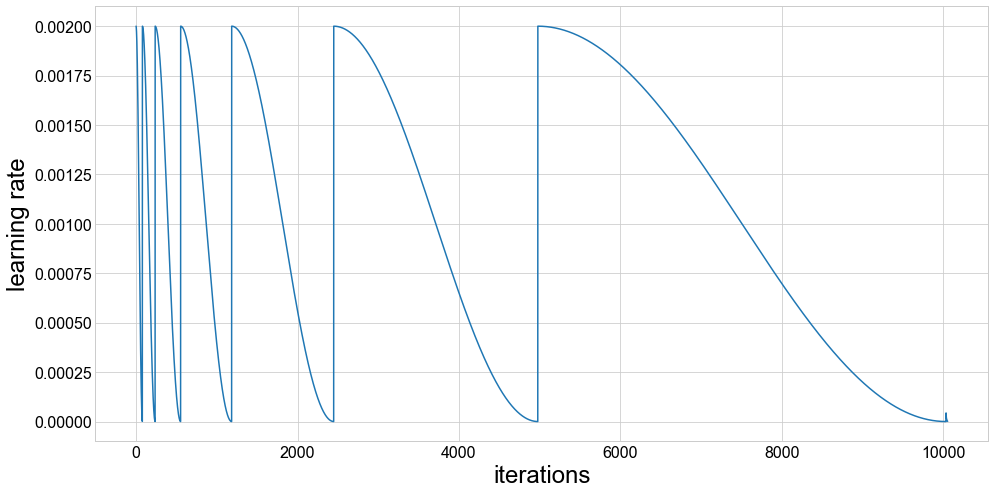

Fold took 81.531s

Training model 9 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.276782). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138671). Check your callbacks.
  % delta_t_median)


1 New best found: 3.717502497637613e-05
2 New best found: 3.5193335308786474e-05
3 New best found: 3.464019421624793e-05
5 New best found: 3.385546997079033e-05
6 New best found: 3.333767623573002e-05
10 New best found: 3.324853639113059e-05
11 New best found: 3.300750338663522e-05
13 New best found: 3.287911547905513e-05
14 New best found: 3.274818303057006e-05
15 New best found: 3.269279791886873e-05
25 New best found: 3.259173985293556e-05
26 New best found: 3.2557940238718e-05
27 New best found: 3.239243485100948e-05
28 New best found: 3.2333281694028e-05
29 New best found: 3.231357086379377e-05
49 New best found: 3.231073378090086e-05
50 New best found: 3.227811807786796e-05
51 New best found: 3.2172291028106084e-05
53 New best found: 3.216928168075059e-05
56 New best found: 3.216747889359432e-05
58 New best found: 3.2109445548087865e-05
60 New best found: 3.208491233353075e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.342114733391104e-05
128 New best fo

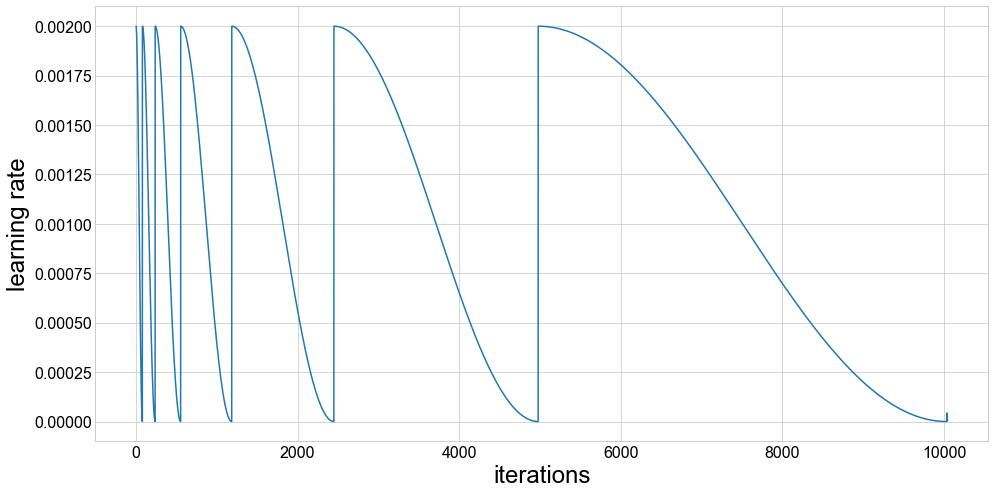

Fold took 78.843s

Training model 10 / 10
Using cosine LR annealing


/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.298710). Check your callbacks.
  % delta_t_median)
/Users/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.149763). Check your callbacks.
  % delta_t_median)


1 New best found: 3.736351546540391e-05
2 New best found: 3.559419453667943e-05
3 New best found: 3.478051401034463e-05
5 New best found: 3.424723115676898e-05
6 New best found: 3.388277050544275e-05
7 New best found: 3.378949579055188e-05
9 New best found: 3.370038154826034e-05
11 New best found: 3.3273978355282454e-05
13 New best found: 3.298641063593095e-05
14 New best found: 3.289692774269497e-05
15 New best found: 3.288826502393931e-05
26 New best found: 3.284011844516499e-05
27 New best found: 3.257513885691879e-05
28 New best found: 3.253878306568367e-05
29 New best found: 3.2517110064509326e-05
30 New best found: 3.2498521925299427e-05
31 New best found: 3.249359215114964e-05
49 New best found: 3.247424143846729e-05
50 New best found: 3.24151689404971e-05
56 New best found: 3.236118689455907e-05
59 New best found: 3.234371088692569e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=7.659675222511076e-05
128 New best found: 3.233781786620966e-05
Early stoppin

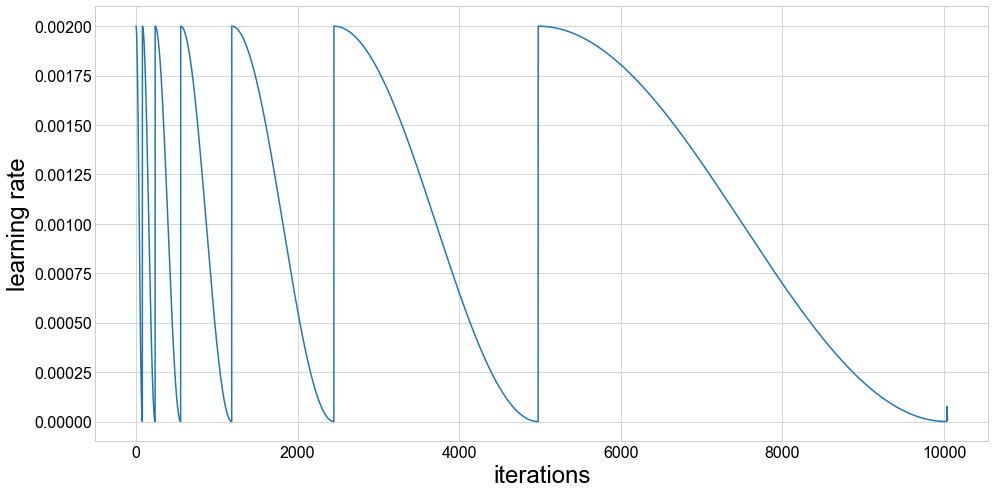

Fold took 80.170s


______________________________________
Training finished
Cross-validation took 864.129s 


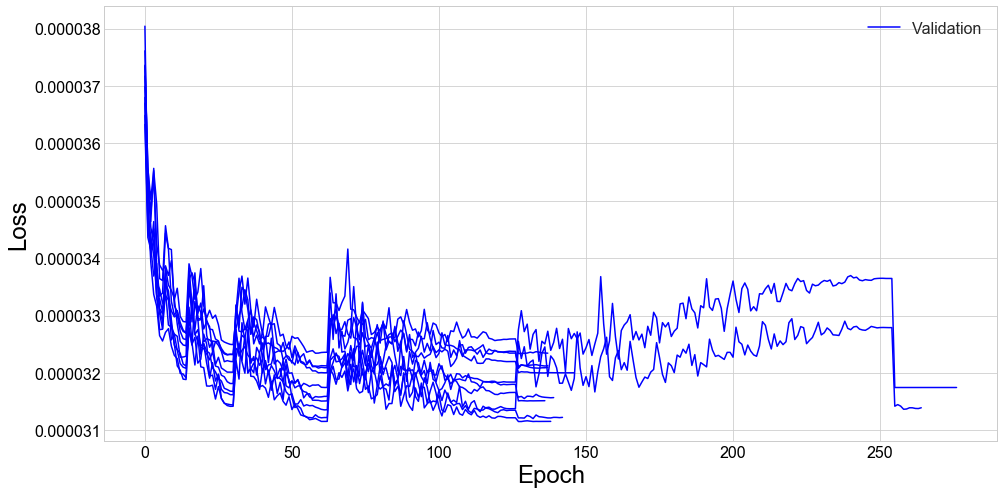

Mean loss = 3.17e-05 +- 1e-07
Mean wAUC = 0.063 +- 0.0005
Mean AUC = 0.0982 +- 0.0007
Mean AMS = 3.9 +- 0.06
Mean cut = 0.956 +- 0.005
______________________________________



<Figure size 432x288 with 0 Axes>

In [9]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [10]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [11]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 5 with loss = 3.115319878535533e-05
Model 1 is 3 with loss = 3.120419397802885e-05
Model 2 is 4 with loss = 3.134776399870037e-05
Model 3 is 2 with loss = 3.15094152581878e-05
Model 4 is 6 with loss = 3.155334480543388e-05
Model 5 is 0 with loss = 3.174634017514845e-05
Model 6 is 7 with loss = 3.199973109805924e-05
Model 7 is 8 with loss = 3.2079417631453084e-05
Model 8 is 1 with loss = 3.210695963498438e-05
Model 9 is 9 with loss = 3.233781786620966e-05


## Response on validation data

In [12]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [13]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0012151138786000955s per sample

Predicting fold 2 out of 10
Prediction took 0.0001952395198000886s per sample

Predicting fold 3 out of 10
Prediction took 0.00019462632600007054s per sample

Predicting fold 4 out of 10
Prediction took 0.00019438886059997457s per sample

Predicting fold 5 out of 10
Prediction took 0.0001933769207998921s per sample

Predicting fold 6 out of 10
Prediction took 0.00020654809340012433s per sample

Predicting fold 7 out of 10
Prediction took 0.00020151061619999382s per sample

Predicting fold 8 out of 10
Prediction took 0.00019596610179996787s per sample

Predicting fold 9 out of 10
Prediction took 0.00019440870559992617s per sample

Predicting fold 10 out of 10
Prediction took 0.00020638824960005878s per sample



In [14]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9041116951347183, weighted 0.9360395848529083


In [15]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.942476675557586, 0.9656169)

In [16]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.97+-0.01
Exact mean cut 0.9659980764845386, corresponds to calc_ams of 3.9319602563472675
CPU times: user 3.39 s, sys: 4.93 s, total: 8.32 s
Wall time: 1min 25s


(4.0, 0.97)

# Test scoring

In [17]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [18]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.00019653254460000343s per sample

Predicting fold 2 out of 10
Prediction took 0.00019936633412726224s per sample

Predicting fold 3 out of 10
Prediction took 0.00019475431389090028s per sample

Predicting fold 4 out of 10
Prediction took 0.00019973227823636328s per sample

Predicting fold 5 out of 10
Prediction took 0.00019286242967272383s per sample

Predicting fold 6 out of 10
Prediction took 0.00019290814210909792s per sample

Predicting fold 7 out of 10
Prediction took 0.00019673698078181173s per sample

Predicting fold 8 out of 10
Prediction took 0.00019628154094544615s per sample

Predicting fold 9 out of 10
Prediction took 0.00019371296730909805s per sample

Predicting fold 10 out of 10
Prediction took 0.00019380860512727932s per sample

CPU times: user 2min 2s, sys: 12.3 s, total: 2min 14s
Wall time: 1min 47s


In [40]:
score_test_data(test_fy.source, 0.9659980764845386)

Public:Private AMS: 3.5867860094761412 : 3.6715387562894466


(3.5867860094761412, 3.6715387562894466)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)